# STOR 535: Lab3
### Submit the PDF version of this homework to gradescope by March 11

In [78]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

## Gambler's Ruin Problem


In this problem, you will explore the Gambler's Ruin problem by visualizing multiple random walk trials. In the Gambler's Ruin problem, a gambler starts with an `initial budget` and bets \$1 repeatedly until one of two outcomes occurs:

- **Ruin:** The gambler loses all their money (capital reaches 0).
- **Win:** The gambler reaches a predefined target capital.

At each bet:
- With probability **p**, the gambler wins \$1.
- With probability **(1 - p)**, the gambler loses \$1.

We'll use these default parameters:
- **Initial Budget:** B = 10
- **Target Capital:** C = 20
- **Winning Probability:** p = 0.45

Before writing your own simulation function, you'll first visualize some trials to see how the random walk behaves.


### 1. Single-Trial Visualization

**Task:**  
- Set the random seed to 1.
- Simulate a single random walk (one trial) of the gambler’s capital over time.
- Visualize the trajectory until the gambler either reaches ruin (0) or wins (reaches target capital).

*Hint:* Use a loop to simulate the bets and record the capital at each step.


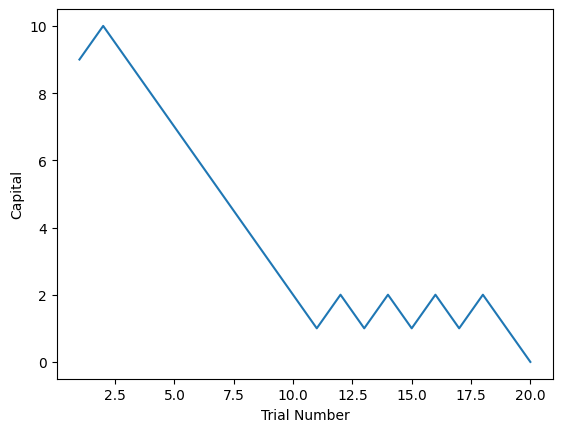

In [79]:
np.random.seed(1)
B = 10
C = 20
p = 0.45
n = 1

def simulate_trials(B, C, p):
    capital = []
    budget = B
    while budget > 0:
        budget -= 1
        budget += int(np.random.choice([0, 2], p=[1-p, p]))
        capital.append(budget)
        if budget == C:
            break
    return capital

trials = simulate_trials(B, C, p)
plt.plot(range(1, len(trials) + 1), trials)
plt.xlabel('Trial Number')
plt.ylabel('Capital')
plt.show()

### 2. Multiple-Trial Visualization

**Task:**  
- For each random seed in the list `[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]`, simulate an independent trial.
- Plot all 10 trajectories on a single graph to compare the variability in outcomes.


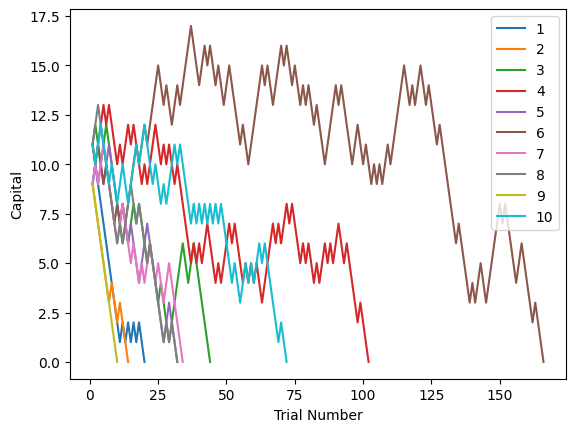

In [80]:
seeds_list = [1,2,3,4,5,6,7,8,9,10]
for i in seeds_list:
    np.random.seed(i)
    trials = simulate_trials(B, C, p)
    plt.plot(range(1, len(trials) + 1), trials)
plt.xlabel('Trial Number')
plt.ylabel('Capital')
plt.legend(seeds_list)

### 3. Simulation Function Implementation

**Task:**  
Write a function `simulate_gambler_ruin(initial_budget, target, p)` that:
- Simulates the gambler’s game until either ruin (capital = 0) or win (capital = target) is reached.
- Returns:
  - The trajectory of the gambler's capital over time.
  - The final exit state (0 for ruin, or the target capital).


In [81]:
def simulate_gambler_ruin(initial_budget, target, p):
    trajectory = simulate_trials(initial_budget, target, p)
    exit_state = trajectory[-1]
    return trajectory, exit_state

### 4. Density Distribution of Exit States

**Task:**  
- Using the function `simulate_gambler_ruin`, run 10,000 independent trials.
- Record the exit state (either 0 or the target capital) for each trial.
- Visualize the density distribution (for example, using a histogram) of these exit states.


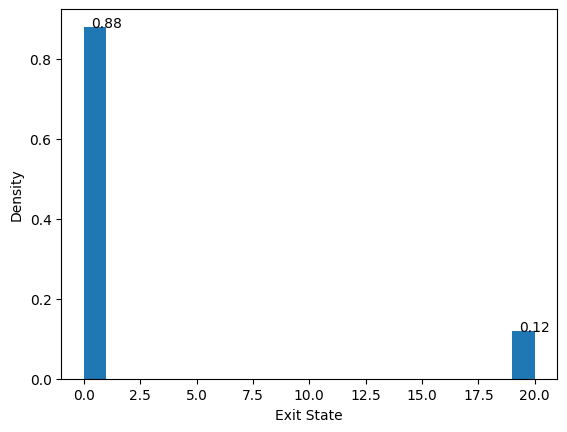

In [82]:
exit_state = []
for i in range(10000):
    c = simulate_gambler_ruin(10, 20, 0.45)
    exit_state.append(c[1])

# Histogram of exit states density
plt.hist(exit_state, density = True, bins=range(0, 21))
# add density numbers to top of bars
plt.text(1, round(exit_state.count(0)/10000, 2), str(round(exit_state.count(0)/10000, 2)), color='black', ha='center')
plt.text(20, round(exit_state.count(20)/10000, 2), str(round(exit_state.count(20)/10000, 2)), color='black', ha='center')
plt.xlabel('Exit State')
plt.ylabel('Density')
plt.show()

### 5. Effect of Initial Budget on Outcomes

**Task:**  
- Fix the target capital at C = 20.
- Vary the initial budget (B) using values from the list `[2, 4, 6, 8, 10, 11, 12, 14, 16, 18]`.
- For each initial budget, simulate the game 1000 times and record the exit state.
- Use line plots to visualize how the distribution of exit states changes with different initial budgets.


Text(0.5, 0, 'Initial Budget')

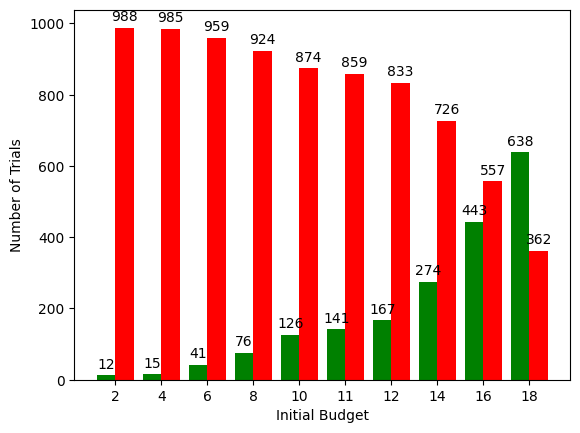

In [83]:
init_B = [2,4,6,8,10,11,12,14,16,18]
exit_states = []
for i in init_B:
    exit = []
    for j in range(1000):
        c = simulate_gambler_ruin(i, 20, 0.45)
        exit.append(c[1])
    exit_states.append(exit)

# Use line plots to show the exit states for different initial budgets
fig, ax = plt.subplots(1)
width = 0.40
multiplier = 0

for i in range(len(init_B)):
    # Place win_bar to the left and lose_bar to the right for each initial budget index
    win_bar = ax.bar(i - width/2, np.sum(exit_states[i]) / 20, width, label='Win', color = 'green')
    ax.bar_label(win_bar, label_type='edge', padding = 3)
    lose_bar = ax.bar(i + width/2, 1000 - np.sum(exit_states[i]) / 20, width, label='Lose', color = 'red')
    ax.bar_label(lose_bar, label_type='edge', padding = 3)
    
ax.set_xticks(range(len(init_B)))
ax.set_xticklabels(init_B)
ax.set_ylabel('Number of Trials')
ax.set_xlabel('Initial Budget')


### 6. Impact of Winning Probability on Outcomes

**Task:**  
- With fixed parameters (B = 10 and C = 20), vary the winning probability `p` using the list `[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]`.
- For each value of `p`, simulate the game 1000 times and record the exit state.
- Visualize how changes in `p` affect the win rate or distribution of outcomes using line plots.


Text(0.5, 0, 'Probability to win a bet')

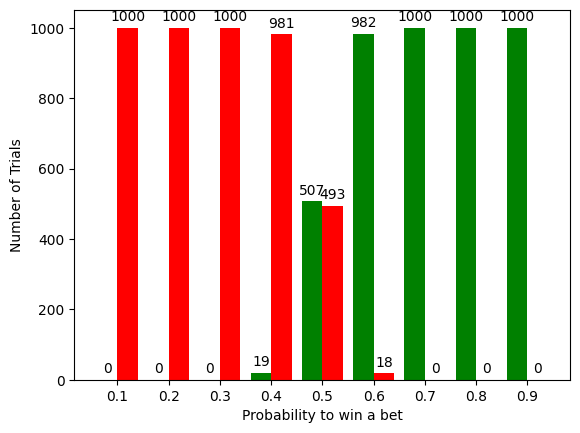

In [84]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
exit_states = []
for i in p:
    exit = []
    for j in range(1000):
        c = simulate_gambler_ruin(10, 20, i)
        exit.append(c[1])
    exit_states.append(exit)

# Use line plots to show the exit states for different initial budgets
fig, ax = plt.subplots(1)
width = 0.40
multiplier = 0

for i in range(len(p)):
    # Place win_bar to the left and lose_bar to the right for each initial budget index
    win_bar = ax.bar(i - width/2, np.sum(exit_states[i]) / 20, width, label='Win', color = 'green')
    ax.bar_label(win_bar, label_type='edge', padding = 3)
    lose_bar = ax.bar(i + width/2, 1000 - np.sum(exit_states[i]) / 20, width, label='Lose', color = 'red')
    ax.bar_label(lose_bar, label_type='edge', padding = 3)
    
ax.set_xticks(range(len(p)))
ax.set_xticklabels(p)
ax.set_ylabel('Number of Trials')
ax.set_xlabel('Probability to win a bet')

### 7. Relationship Between Target Capital and Number of Bets

**Task:**  
- With fixed parameters (p = 0.45 and B = 10), vary the target capital (C) using the list `[20, 30, 40, 50, 60, 70]`.
- For each target capital, simulate the game 1000 times and record the number of bets taken until the game stops.
- Visualize the relationship between the target capital and the average number of bets required using a line plot.


Text(0.5, 1.0, 'Average Number of Bets vs Target Capital')

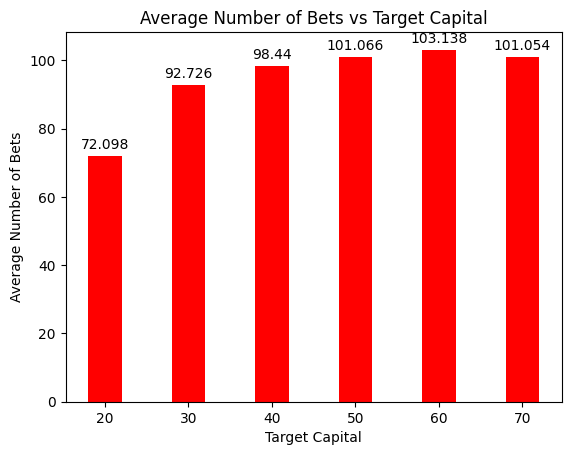

In [85]:
cap = [20, 30, 40, 50, 60, 70]
num_bets_all = []
for i in cap:
    num_bets = []
    for j in range(1000):
        c = simulate_gambler_ruin(10, i, 0.45)
        trajectory = c[0]
        num_bets.append(len(trajectory))
    num_bets_all.append(num_bets)
    
# Use line plots to show the exit states for different initial budgets
fig, ax = plt.subplots(1)
width = 0.40
multiplier = 0

for i in range(len(cap)):
    # Relationship between the number of bets and the target capital
    bar = ax.bar(i, np.mean(num_bets_all[i]), width, label='Mean Number of Bets', color = 'red')
    ax.bar_label(bar, label_type='edge', padding = 3)
    
    
ax.set_xticks(range(len(cap)))
ax.set_xticklabels(cap)
ax.set_ylabel('Average Number of Bets')
ax.set_xlabel('Target Capital')
ax.set_title('Average Number of Bets vs Target Capital')

### 8. Simulation with Unbounded Target (Infinite Capital)

In this problem, the gambler's target is effectively unbounded (i.e., the gambler always wants to win more and only stops if ruined). We use the following parameters:
- **Initial Budget (B):** 10
- **Winning Probability (p):** 0.5 (fair game)
- **Maximum Bets:** 10,000 (to prevent an infinite simulation)

**Task:**  
- Run the simulation 1,000 times.  
- In each simulation, allow the gambler to bet up to 10,000 times, stopping earlier if ruin (capital reaches 0) occurs.  
- Record the final capital after each simulation (if the maximum bet limit is reached before ruin, record the current capital).  
- Visualize the distribution of the final capitals using a histogram.


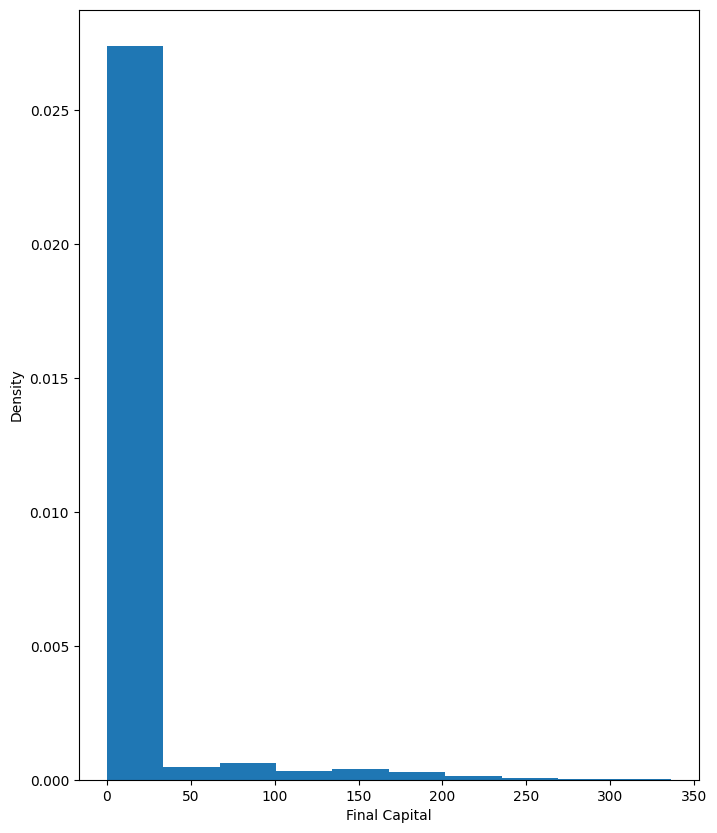

In [87]:
B = 10
p = 0.5
max_num_bets = 10000
# no target capital, keep betting
def no_limit_simulation(B, p, max_bets):
    budget = B
    bet_num = 1
    while budget > 0:
        budget -= 1
        budget += int(np.random.choice([0, 2], p=[1-p, p]))
        if bet_num == max_bets:
            break
        bet_num += 1
    return budget

# Simulate the final capitals for 1000 trials
final_capitals = []
for i in range(1000):
    final_capitals.append(no_limit_simulation(B, p, max_num_bets))

# Plot the histogram of final capitals
plt.figure(figsize=(8, 10))
plt.hist(final_capitals, density=True)
plt.xlabel('Final Capital')
plt.ylabel('Density')
plt.show()


### 9. Impact of Target Capital

**Task:**  
- With fixed parameters (p = 0.45 and B = 10), vary the target capital (C) using the list `[20, 30, 40, 50, 60, 70]`.
- For each target capital, simulate the game 1000 times and record the exit states.
- Visualize the relationship between the target capital and the exit states (e.g., compute and plot the win rate, where a win means the exit state equals the target capital).
- Compare these results with Problem 8. What do you observe?


Target Capital 20: Win Rate = 0.105
Target Capital 30: Win Rate = 0.023
Target Capital 40: Win Rate = 0.002
Target Capital 50: Win Rate = 0.000
Target Capital 60: Win Rate = 0.000
Target Capital 70: Win Rate = 0.000


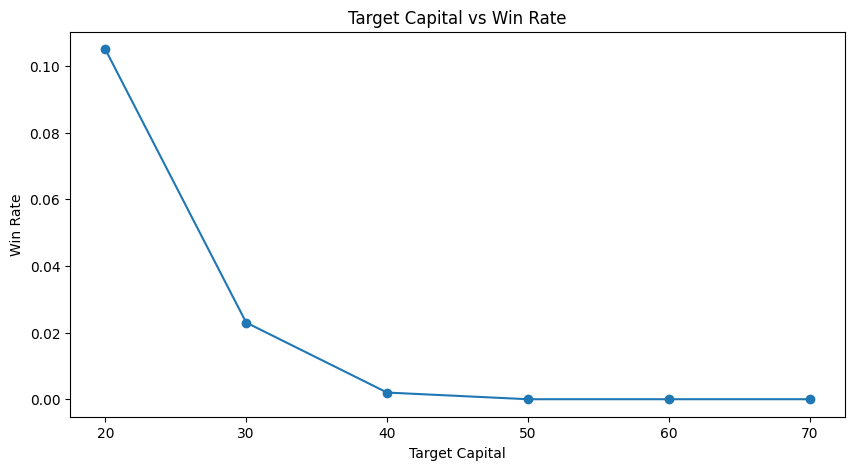

In [ ]:
p = 0.45 
B = 10
target_capitals = [20, 30, 40, 50, 60, 70]
simulations = 1000
win_rates = []

for C in target_capitals:
    wins = 0
    for _ in range(simulations):
        trajectory, exit_state = simulate_gambler_ruin(B, C, p)
        if exit_state == C:
            wins += 1
    win_rate = wins/simulations
    win_rates.append(win_rate)
    print(f"Target Capital {C}: Win Rate = {win_rate:.3f}")

plt.figure(figsize=(10, 5))
plt.plot(target_capitals, win_rates, marker='o')
plt.title("Target Capital vs Win Rate")
plt.xlabel("Target Capital")
plt.ylabel("Win Rate")
plt.show()

With p = 0.45, since the odds are against the player, the win rate decreases as the target capital required to complete the game increases. Our results here seem to agree with the results in problem 8, as the previous results showed us that with no target capital, or a target capital of "infinity", the majority of trials ended at or near 0, with no win. 

# 10. Coupon Collector Problem with a Twist

Suppose you are the boss of a company that issues 10 types of collectible cards. Each box costs \$2 and contains one random card. The cards have non-uniform probabilities given by:

- **Card 1 (common card):** probability = $\frac{1+p}{10}$
- **Cards 2 to 9:** probability = $\frac{1}{10}$ each
- **Card 10 (rare card):** probability = $\frac{1-p}{10}$

Since these probabilities add to 1, they form a valid distribution regardless of $p$.

**Task:**  
You want to make the expected value of a full collection (i.e. collect all 10 types) be \$10,000. 

Given this goal, use python and simulation to determine the best value of $p$ and the probability of having a rare type of card.


**Hint:**
1. Write a simulation function that counts how many boxes are needed to collect all 10 cards.
2. Since each box costs \$2, a customer needs on average 5,000 boxes to complete the collection. Your goal is to determine the value of \( p \) such that the simulation yields an average of 5,000 boxes per complete collection.
3. Use a search method (e.g., binary search) to “tune” $p$ until the expected number of boxes is approximately 5,000.


In [ ]:
def boxes_needed(p):
    probabilities = np.array([(1+p)/10] + [1/10]*8 + [(1-p)/10])
    cards = [1,2,3,4,5,6,7,8,9,10]
    collected = set()
    
    boxes = 0
    while len(collected) < 10:
        boxes += 1
        card = np.random.choice(cards, p = probabilities)
        if(card not in collected):
            collected.add(card)
    return boxes

In [ ]:
def simulate_average_boxes(p):
    boxes = []
    for i in range(500):
        boxes.append(boxes_needed(p))
    return np.mean(boxes)

In [ ]:
start = 0.95
stop = 0.999
diff = 15
best = 0.95
count = 0
while(stop - start > .001):
    mid = (stop+start)/2
    boxes = simulate_average_boxes(mid)
    if(boxes < 5000 - diff): 
        start = mid
    else:
        stop = mid
    best = mid
    count+=1
    print(f"{best:.3f}")
    

print(f"Best probability: {best:.3f}, Probability to have a rare card:{(1-best)/10:.5f})")


Best probability: 0.998, Probability to have a rare card:0.00018)
